# Ciencia y analítica de datos
# Alumnos:
# Javier Granados - A00566717
# Josías Ruiz - A00968460
# Profesor:
# María de la Paz Rico Fernández
# Entrega:
# Reto-> Entrega 1 (16/11) -> Limpieza, análisis, visualización y kmeans
# Fecha:
# 16/11/2022

In [1]:
import pandas as pd
import numpy as np
import io
import requests
import urllib.request
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

pd.set_option('display.max_columns', None)

In [2]:
url1 = 'https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo_114/main/Reto1/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'
url2 = 'https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo_114/main/Reto1/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv'

In [3]:
df_sub = pd.read_csv(url1, encoding_errors='ignore', error_bad_lines=False)
df_sup = pd.read_csv(url2, encoding_errors='ignore', error_bad_lines=False)

C:\Users\josia\AppData\Local\Temp\ipykernel_26600\1998719280.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_sub = pd.read_csv(url1, encoding_errors='ignore', error_bad_lines=False)
C:\Users\josia\AppData\Local\Temp\ipykernel_26600\1998719280.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_sup = pd.read_csv(url2, encoding_errors='ignore', error_bad_lines=False)


# Mapeao de Indicadores de calidad

In [4]:
df_sup.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'CUENCA', 'CUERPO DE AGUA', 'TIPO', 'SUBTIPO', 'LONGITUD', 'LATITUD',
       'PERIODO', 'DBO_mg/L', 'CALIDAD_DBO', 'DQO_mg/L', 'CALIDAD_DQO',
       'SST_mg/L', 'CALIDAD_SST', 'COLI_FEC_NMP_100mL', 'CALIDAD_COLI_FEC',
       'E_COLI_NMP_100mL', 'CALIDAD_E_COLI', 'ENTEROC_NMP_100mL',
       'CALIDAD_ENTEROC', 'OD_PORC', 'CALIDAD_OD_PORC', 'OD_PORC_SUP',
       'CALIDAD_OD_PORC_SUP', 'OD_PORC_MED', 'CALIDAD_OD_PORC_MED',
       'OD_PORC_FON', 'CALIDAD_OD_PORC_FON', 'TOX_D_48_UT', 'CALIDAD_TOX_D_48',
       'TOX_V_15_UT', 'CALIDAD_TOX_V_15', 'TOX_D_48_SUP_UT',
       'CALIDAD TOX_D_48_SUP', 'TOX_D_48_FON_UT', 'CALIDAD_TOX_D_48_FON',
       'TOX_FIS_SUP_15_UT', 'CALIDAD_TOX_FIS_SUP_15', 'TOX_FIS_FON_15_UT',
       'CALIDAD_TOX_FIS_FON_15', 'SEMAFORO', 'CONTAMINANTES', 'CUMPLE_CON_DBO',
       'CUMPLE_CON_DQO', 'CUMPLE_CON_SST', 'CUMPLE_CON_CF',
       'CUMPLE_CON_E_COLI', 'CUMPLE_CON_ENTEROC', 'CUMPLE_CON_OD',
  

In [5]:
indicadoresCalidadSup = ['CALIDAD_TOX_V_15',
                      'CALIDAD_TOX_D_48',
                      'CALIDAD_SST',
                      'CALIDAD_ENTEROC',
                      'CALIDAD_E_COLI',
                      'CALIDAD_DQO',
                      'CALIDAD_DBO',
                      'CALIDAD_COLI_FEC',
                      'CALIDAD_OD_PORC']

In [6]:
QtyLabels = []
for x in indicadoresCalidadSup:
    print(x)
    #print(df_sup[x].isna().sum())
    Qty=df_sup[x].unique()
    print(Qty)
    for y in Qty: 
        QtyLabels.append(y)


CALIDAD_TOX_V_15
[nan 'No Toxico' 'Toxicidad moderada' 'Toxicidad alta' 'Toxicidad baja']
CALIDAD_TOX_D_48
[nan 'No Toxico' 'Toxicidad moderada' 'Toxicidad baja' 'Toxicidad alta']
CALIDAD_SST
['Excelente' 'Buena calidad' 'Contaminada' 'Aceptable' nan
 'Fuertemente contaminada']
CALIDAD_ENTEROC
[nan 'Excelente' 'Contaminada' 'Fuertemente contaminada' 'Buena calidad']
CALIDAD_E_COLI
['Excelente' nan 'Buena calidad' 'Fuertemente contaminada' 'Contaminada'
 'Aceptable']
CALIDAD_DQO
['Contaminada' nan 'Excelente' 'Aceptable' 'Buena calidad'
 'Fuertemente contaminada']
CALIDAD_DBO
['Buena calidad' nan 'Excelente' 'Aceptable' 'Contaminada'
 'Fuertemente contaminada']
CALIDAD_COLI_FEC
['Contaminada' nan 'Buena calidad' 'Fuertemente contaminada' 'Excelente'
 'Aceptable']
CALIDAD_OD_PORC
[nan 'Excelente' 'Contaminada' 'Fuertemente contaminada' 'Aceptable'
 'Buena calidad']


In [7]:
QtyLabels=list(dict.fromkeys(QtyLabels))
QtyLabels

[nan,
 'No Toxico',
 'Toxicidad moderada',
 'Toxicidad alta',
 'Toxicidad baja',
 'Excelente',
 'Buena calidad',
 'Contaminada',
 'Aceptable',
 'Fuertemente contaminada']

In [8]:
df_sup.replace({
    'Excelente':5,
    'Buena calidad':4,
    'Aceptable':3,
    'Contaminada':2,
    'Fuertemente contaminada':1,
    'No Toxico':4,
    'Toxicidad moderada':3,
    'Toxicidad baja':2,
    'Toxicidad alta':1,
    np.NaN:0
}, inplace=True)

In [9]:
conservarCols =indicadoresCalidadSup + ['ESTADO',
 'LATITUD',
 'LONGITUD',
 'SEMAFORO'                
]

conservarCols

['CALIDAD_TOX_V_15',
 'CALIDAD_TOX_D_48',
 'CALIDAD_SST',
 'CALIDAD_ENTEROC',
 'CALIDAD_E_COLI',
 'CALIDAD_DQO',
 'CALIDAD_DBO',
 'CALIDAD_COLI_FEC',
 'CALIDAD_OD_PORC',
 'ESTADO',
 'LATITUD',
 'LONGITUD',
 'SEMAFORO']

In [10]:
removerCols = [x for x in df_sup.columns if x not in conservarCols]

In [11]:
# Remover columnas qeu no utilizaremos
df_sup.drop(columns=removerCols, inplace=True)

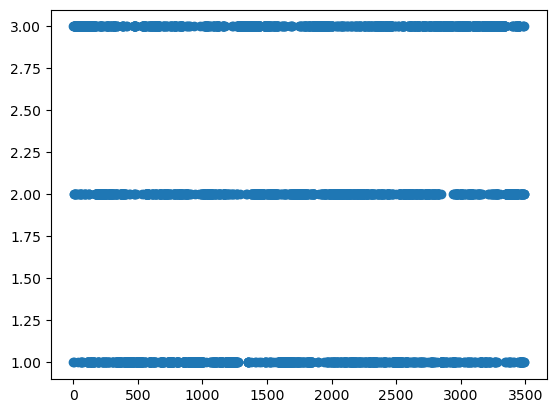

In [12]:
df_sup.replace({
    'Verde':3,
    'Amarillo':2,
    'Rojo':1
}, inplace=True)
plt.scatter(df_sup.index, df_sup['SEMAFORO'])

In [13]:
df_sup['SEMAFORO'].describe()

count    3493.000000
mean        2.050386
std         0.820194
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: SEMAFORO, dtype: float64

In [14]:
df_sup['SEMAFORO'].value_counts()

3    1267
2    1135
1    1091
Name: SEMAFORO, dtype: int64

In [15]:
df_sup

,ESTADO,LONGITUD,LATITUD,CALIDAD_DBO,CALIDAD_DQO,CALIDAD_SST,CALIDAD_COLI_FEC,CALIDAD_E_COLI,CALIDAD_ENTEROC,CALIDAD_OD_PORC,CALIDAD_TOX_D_48,CALIDAD_TOX_V_15,SEMAFORO
0,AGUASCALIENTES,-102.33911,22.24730,4.0,2.0,5.0,2.0,5.0,0.0,0.0,0.0,0.0,1
1,BAJA CALIFORNIA SUR,-109.84290,22.90473,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,3
2,BAJA CALIFORNIA SUR,-109.86442,22.89880,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,3
3,BAJA CALIFORNIA SUR,-109.88604,22.89609,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,3
4,BAJA CALIFORNIA SUR,-109.89657,22.87694,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3488,TAMAULIPAS,-99.42142,26.78971,5.0,5.0,3.0,2.0,1.0,0.0,4.0,4.0,4.0,2
3489,TAMAULIPAS,-99.53064,27.43714,2.0,2.0,4.0,2.0,5.0,0.0,0.0,0.0,0.0,1
3490,TAMAULIPAS,-99.50727,27.49901,4.0,2.0,4.0,3.0,5.0,0.0,5.0,4.0,4.0,1
3491,TAMAULIPAS,-99.52221,27.49631,5.0,3.0,4.0,2.0,5.0,0.0,5.0,4.0,4.0,2


In [16]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.tree import DecisionTreeClassifier


In [17]:
# Split data
X = df_sup.iloc[:,1:-1]
y = df_sup.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X

,LONGITUD,LATITUD,CALIDAD_DBO,CALIDAD_DQO,CALIDAD_SST,CALIDAD_COLI_FEC,CALIDAD_E_COLI,CALIDAD_ENTEROC,CALIDAD_OD_PORC,CALIDAD_TOX_D_48,CALIDAD_TOX_V_15
0,-102.33911,22.24730,4.0,2.0,5.0,2.0,5.0,0.0,0.0,0.0,0.0
1,-109.84290,22.90473,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0
2,-109.86442,22.89880,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0
3,-109.88604,22.89609,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0
4,-109.89657,22.87694,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3488,-99.42142,26.78971,5.0,5.0,3.0,2.0,1.0,0.0,4.0,4.0,4.0
3489,-99.53064,27.43714,2.0,2.0,4.0,2.0,5.0,0.0,0.0,0.0,0.0
3490,-99.50727,27.49901,4.0,2.0,4.0,3.0,5.0,0.0,5.0,4.0,4.0
3491,-99.52221,27.49631,5.0,3.0,4.0,2.0,5.0,0.0,5.0,4.0,4.0


In [19]:
classifierRF = RandomForestClassifier(n_estimators=500, max_leaf_nodes=25, n_jobs=-1)
classifierRF.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=25, n_estimators=500, n_jobs=-1)

# Feature Importance

In [20]:
featureImportances = {}
for name, score in zip(df_sup.columns[1:-1], classifierRF.feature_importances_):
  featureImportances[name] = score
  print('{0:20s} -> {1:6.3f}'.format(name, score*100))

LONGITUD             ->  1.956
LATITUD              ->  1.739
CALIDAD_DBO          ->  8.725
CALIDAD_DQO          -> 36.669
CALIDAD_SST          ->  1.556
CALIDAD_COLI_FEC     -> 21.035
CALIDAD_E_COLI       ->  7.880
CALIDAD_ENTEROC      -> 14.933
CALIDAD_OD_PORC      ->  2.347
CALIDAD_TOX_D_48     ->  1.049
CALIDAD_TOX_V_15     ->  2.112


In [21]:
_ = pd.DataFrame(featureImportances, index=[0]).T
_

,0
LONGITUD,0.019565
LATITUD,0.017388
CALIDAD_DBO,0.087248
CALIDAD_DQO,0.366691
CALIDAD_SST,0.015556
CALIDAD_COLI_FEC,0.210346
CALIDAD_E_COLI,0.078802
CALIDAD_ENTEROC,0.149329
CALIDAD_OD_PORC,0.023471
CALIDAD_TOX_D_48,0.010487


C:\Users\josia\AppData\Local\Temp\ipykernel_26600\160055749.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(_.index, rotation = 45)


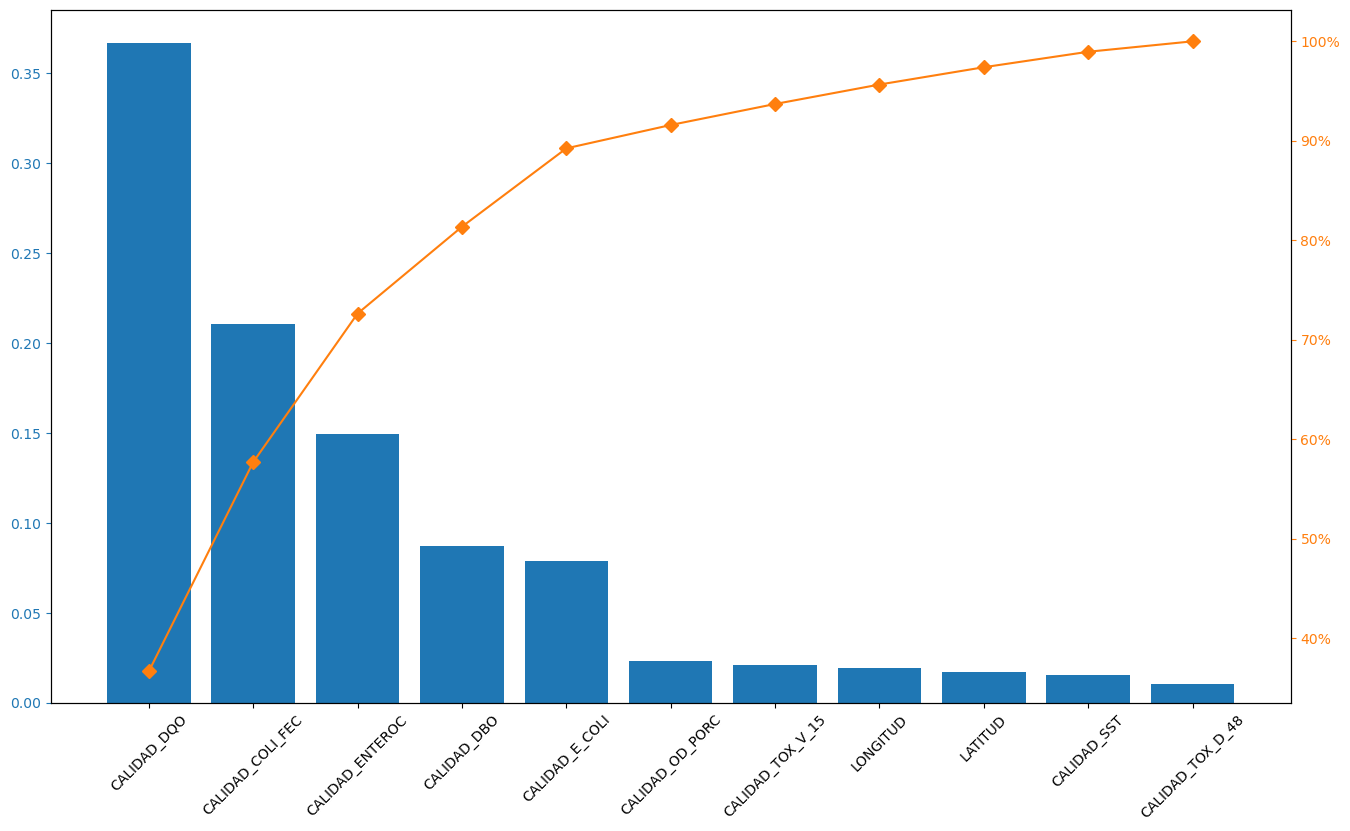

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

_.rename(columns={0:'Importancia'}, inplace=True)
_ = _.sort_values(by='Importancia',ascending=False)
_["Importancia_porcentaje"] = _["Importancia"].cumsum()/_["Importancia"].sum()*100


fig, ax = plt.subplots(figsize=(16,9))
ax.bar(_.index, _["Importancia"], color="C0")
ax2 = ax.twinx()
ax2.plot(_.index, _["Importancia_porcentaje"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
ax.set_xticklabels(_.index, rotation = 45)
plt.show()


In [23]:
_

,Importancia,Importancia_porcentaje
CALIDAD_DQO,0.366691,36.669089
CALIDAD_COLI_FEC,0.210346,57.703718
CALIDAD_ENTEROC,0.149329,72.636613
CALIDAD_DBO,0.087248,81.361423
CALIDAD_E_COLI,0.078802,89.241665
CALIDAD_OD_PORC,0.023471,91.588760
CALIDAD_TOX_V_15,0.021117,93.700423
LONGITUD,0.019565,95.656891
LATITUD,0.017388,97.395706
CALIDAD_SST,0.015556,98.951301


In [24]:
# nos quedamos sólo con 11 de 15 propiedades
mostImportantFeatures = []

for i in range(len(_)):
    vrow=_.iloc[i]['Importancia_porcentaje']
    if vrow<95: 
        mostImportantFeatures.append(_.iloc[i].name)
mostImportantFeatures

['CALIDAD_DQO',
 'CALIDAD_COLI_FEC',
 'CALIDAD_ENTEROC',
 'CALIDAD_DBO',
 'CALIDAD_E_COLI',
 'CALIDAD_OD_PORC',
 'CALIDAD_TOX_V_15']

# Model Scoring

In [25]:
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores, titulo, etiquetaX, etiquetaY):

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title(titulo)
    plt.xlabel(etiquetaX)
    plt.ylabel(etiquetaY)
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

In [26]:
# Split de información con los features más importantes
df_sub2 = df_sup[mostImportantFeatures+['SEMAFORO']]
X = df_sub2.iloc[:,:-1]
y = df_sub2.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

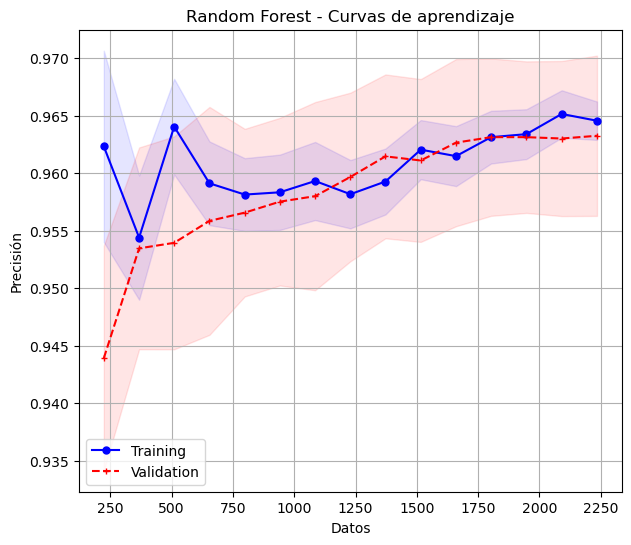

In [27]:
#Model Random Forest
pipeline = Pipeline(steps=[('rf', classifierRF)])
delta_train_sz = np.linspace(0.1, 1.0, num=15, endpoint=True, retstep=False, dtype=None, axis=0)

tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline,    
                                                X = X_train,
                                                y = y_train,
                                                cv = kfold,
                                                train_sizes = delta_train_sz,
                                                random_state=42)
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, 'Random Forest - Curvas de aprendizaje', 'Datos', 'Precisión')

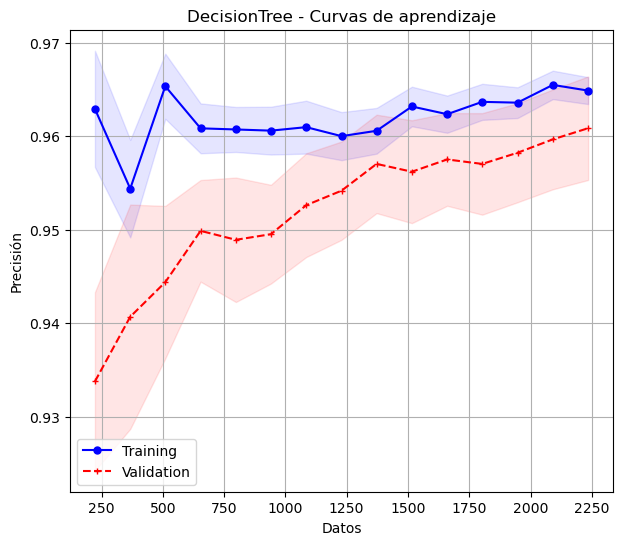

In [28]:
#Model Decision Tree

classifierDT = DecisionTreeClassifier(max_leaf_nodes=25)
pipeline2 = Pipeline(steps=[('dt', classifierDT)])

delta_train_sz = np.linspace(0.1, 1.0, num=15, endpoint=True, retstep=False, dtype=None, axis=0)
tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline2,    
                                                X = X_train,
                                                y = y_train,
                                                cv = kfold,
                                                train_sizes = delta_train_sz,
                                                random_state=42)
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, 'DecisionTree - Curvas de aprendizaje', 'Datos', 'Precisión')